<a href="https://colab.research.google.com/github/ber-pro/MIAT/blob/main/MIAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка данных


In [1]:
!git clone https://github.com/ber-pro/MIAT.git

Cloning into 'MIAT'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 186.07 KiB | 5.64 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [6]:
df = pd.read_excel('/content/MIAT/EsseEthnetic - первичные данные.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   №                                               820 non-null    int64  
 1   Этническая принадлежность                       820 non-null    int64  
 2   возраст                                         820 non-null    int64  
 3   возрастная группа                               820 non-null    int64  
 4   пол                                             820 non-null    int64  
 5   курение                                         820 non-null    int64  
 6   рост                                            820 non-null    float64
 7   вес                                             820 non-null    float64
 8   ИМТ                                             820 non-null    float64
 9   объем талии                                

## Постановка задачи


1. Прогнозирование попадания человека в группу риска сердечно-сосудистыми заболеваниями на основе амбулаторных анализов.
2. Определение возрастной группы на основе амбулаторных анализов.
3. Диагностика сахарного диабета.
4. Определение состояния сосудов по антропологическим данным




##Определение состояния сосудов по антропологическим данным





##**Предварительная обработка**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   №                                               820 non-null    int64  
 1   Этническая принадлежность                       820 non-null    int64  
 2   возраст                                         820 non-null    int64  
 3   возрастная группа                               820 non-null    int64  
 4   пол                                             820 non-null    int64  
 5   курение                                         820 non-null    int64  
 6   рост                                            820 non-null    float64
 7   вес                                             820 non-null    float64
 8   ИМТ                                             820 non-null    float64
 9   объем талии                                

In [9]:
df.columns

Index(['№', 'Этническая принадлежность', 'возраст', 'возрастная группа', 'пол',
       'курение', 'рост', 'вес', 'ИМТ', 'объем талии', 'Ожирение',
       'систоличепская артериальная гипертензия ',
       'степень систолической артериальной гипертензии', 'САД',
       'диастолическая артериальная гипертензия ', 'ДАД', 'ЧСС', 'ГХС', 'ОХС',
       'ЛПНП', 'Гипоальфахолестеринемия', 'ЛПВП', 'ХС не-ЛПВП',
       'гипертриглицеридемия', 'ТГ', 'ГиперЛП(а)', 'ЛП(а)', 'апоА', 'апоВ',
       'глюкоза', 'креатинин', 'СКФ', 'Гиперурикемия', 'мочевая кислота',
       'CRP', 'SCORE', 'категория риска по SCORE', 'SCORE2',
       'категория риска по SCORE2', 'наличие УЗ диагностики',
       'наличие атеросклероза', 'количество АСБ',
       'суммарный процент стеноза АСБ', 'средний стеноз', 'ДДЛЖ',
       'Наличие STRAIN', 'глобал сокр'],
      dtype='object')

In [10]:
df.drop(["№", "мочевая кислота", "Ожирение","возрастная группа", "систоличепская артериальная гипертензия ", "степень систолической артериальной гипертензии", "диастолическая артериальная гипертензия ", "диастолическая артериальная гипертензия ", "Гипоальфахолестеринемия", "ХС не-ЛПВП", "ТГ", "ГиперЛП(а)", "ЛП(а)", "апоА", "апоВ", "креатинин", "СКФ", "Гиперурикемия", "количество АСБ", "суммарный процент стеноза АСБ", "средний стеноз", "ДДЛЖ", "глобал сокр"], axis=1, inplace=True)

Выберем только те столбцы, которые представляют интерес в контексте сосудистых заболеваний или могут служить потенциальными предикторами:

1. Этническая принадлежность
2. Возраст
4. Пол
5. Курение
6. Рост
7. Вес
8. ИМТ (индекс массы тела)
9. Объем талии

11. Систолическое артериальное давление (САД): Давление в артериях в момент сердечных сокращений. Высокое значение может указывать на гипертензию.

12. Диастолическое артериальное давление (ДАД): Давление в артериях между сердечными сокращениями. Также важный показатель для оценки артериального давления.

13. ЧСС (частота сердечных сокращений): Количество ударов сердца в минуту, что может быть важным при оценке сердечного здоровья.

14. ГХС (гемоглобин в крови): Уровень гемоглобина в крови, который может быть связан с анемией или другими состояниями.

15. ОХС (общий холестерин в крови): Общее количество холестерина в крови, что важно для оценки риска атеросклероза и других сосудистых проблем.

16. ЛПНП (липопротеины низкой плотности): Известные как "плохой" холестерин, который может быть связан с образованием атеросклеротических бляшек.

18. ЛПВП (липопротеины высокой плотности): Известные как "хороший" холестерин, который может защищать от атеросклероза.

19. Гипертриглицеридемия: Высокий уровень триглицеридов в крови, что может быть связано с риском сердечно-сосудистых заболеваний.

20. Глюкоза: Уровень глюкозы в крови, что может быть связано с риском диабета и сосудистых заболеваний.

21. CRP (С-реактивный белок): Показатель воспаления, который может быть связан с риском сердечно-сосудистых заболеваний.

22. SCORE (система расчета риска смерти от сердечно-сосудистых заболеваний): Метод оценки риска развития сердечно-сосудистых событий.

23. Категория риска по SCORE: Категоризация риска в соответствии с системой SCORE.

24. SCORE2 (расширенная система расчета риска смерти от сердечно-сосудистых заболеваний): Улучшенная версия системы SCORE.

25. Категория риска по SCORE2: Категоризация риска в соответствии с расширенной системой SCORE.

26. Наличие атеросклероза: Указывает на наличие атеросклероза, что является сосудистым заболеванием.

28. наличие УЗ диагностики

30. Наличие STRAIN (деформация мышцы сердца): Указывает на наличие деформации мышцы сердца, что может быть связано с сердечно-сосудистыми проблемами.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Этническая принадлежность  820 non-null    int64  
 1   возраст                    820 non-null    int64  
 2   пол                        820 non-null    int64  
 3   курение                    820 non-null    int64  
 4   рост                       820 non-null    float64
 5   вес                        820 non-null    float64
 6   ИМТ                        820 non-null    float64
 7   объем талии                820 non-null    float64
 8   САД                        820 non-null    int64  
 9   ДАД                        820 non-null    int64  
 10  ЧСС                        820 non-null    int64  
 11  ГХС                        820 non-null    int64  
 12  ОХС                        820 non-null    float64
 13  ЛПНП                       820 non-null    float64

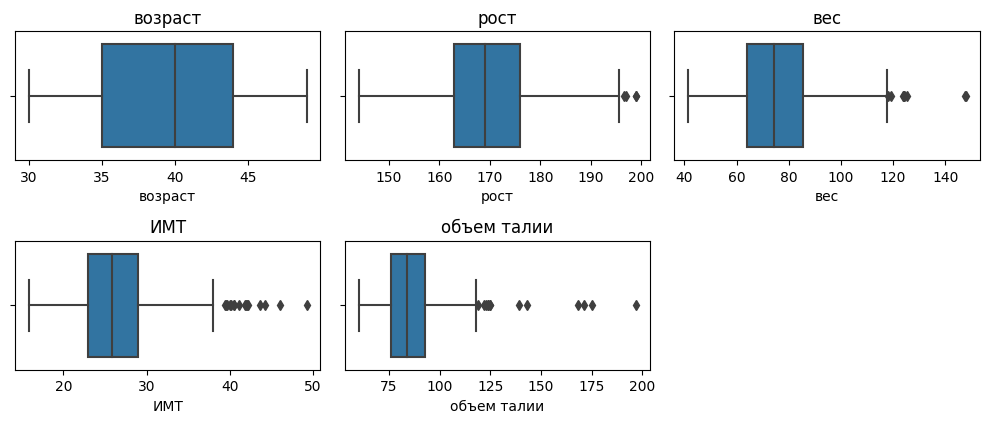

In [16]:
columns = ["возраст", "рост", "вес", "ИМТ", "объем талии"]
plt.figure(figsize=(10, 6))
for index, column in enumerate(columns, 1):
  plt.subplot(3, 3, index)
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.tight_layout()
plt.show()

Переменные имеющие выборосы требует деттального узучения, чтобы определить, являются они ошибочными или отражают реальные измерения.

Возраст - не имеет выбросов, все значения находяться в пределах ожидаемого диапозона.

Рост и вес: выбросы этих переменных имеют место быть, но требуется исследования в связки друг с другом.

Индекс массы тела (ИМТ) выше 40 считается "очень тяжелым ожирением". Несколько выбросов в данных достигают значений более 45, что, возможно, редко встречается, но не исключено. Однако стоит отметить, что такие высокие значения ИМТ могут быть действительными и не обязательно свидетельствовать о наличии ошибок в данных.

Объем талии: имеет явные выбросы. Значения до 150 имеют место быть, но больше явный признак ошибок в данных.

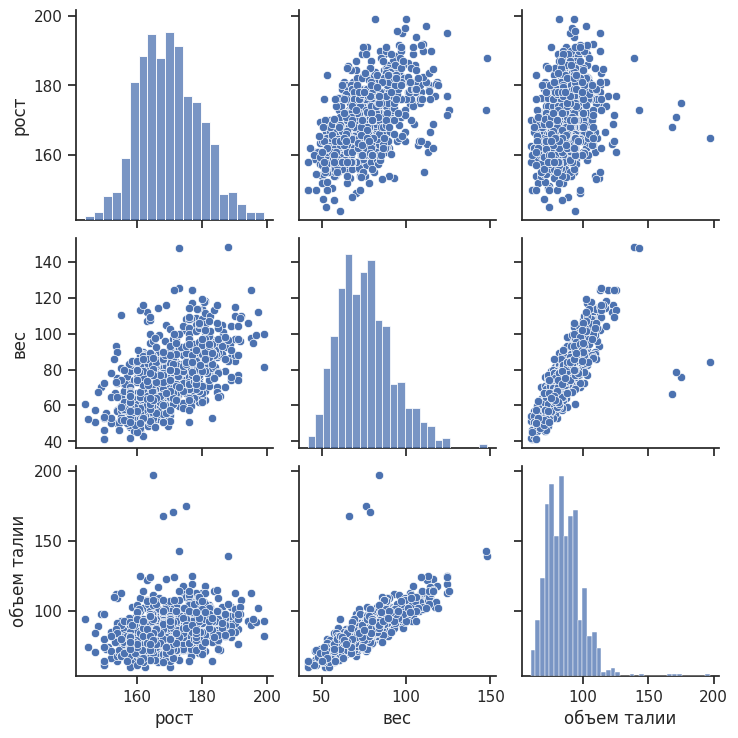

In [ ]:
df1 = df[['рост', 'вес', 'объем талии']]
sns.set(style='ticks')
sns.pairplot(df1, diag_kind='hist')
plt.show()

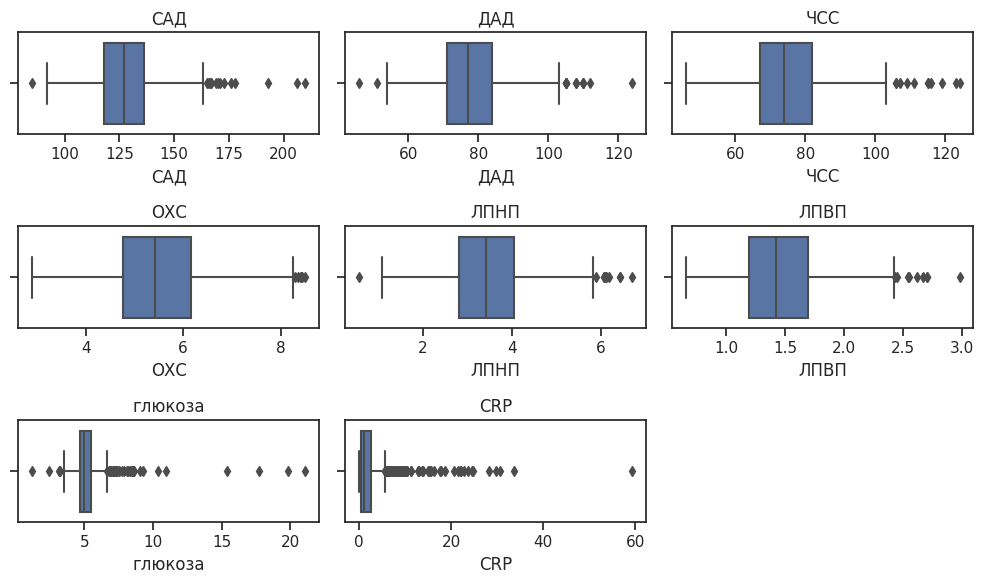

In [ ]:
columns = ["САД", "ДАД", "ЧСС", "ОХС", "ЛПНП", "ЛПВП", "глюкоза", "CRP"]
plt.figure(figsize=(10, 6))
for index, column in enumerate(columns, 1):
  plt.subplot(3, 3, index)
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.tight_layout()
plt.show()

Пересчитаем индекс массы тела и удалим столбцы 'вес' и 'рост'

In [ ]:
df['ИМТ'] = df['вес'] / ((df['рост']/100) ** 2)
df.drop(['вес', 'рост'],axis=1, inplace=True)

##**Статистический анализ**